# Crop Recommendation & Web App

In [1]:
import numpy as np
import pandas as pd
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data.csv')
df1.shape

(2200, 8)

In [3]:
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
len(df1['label'].unique())

22

In [8]:
df1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

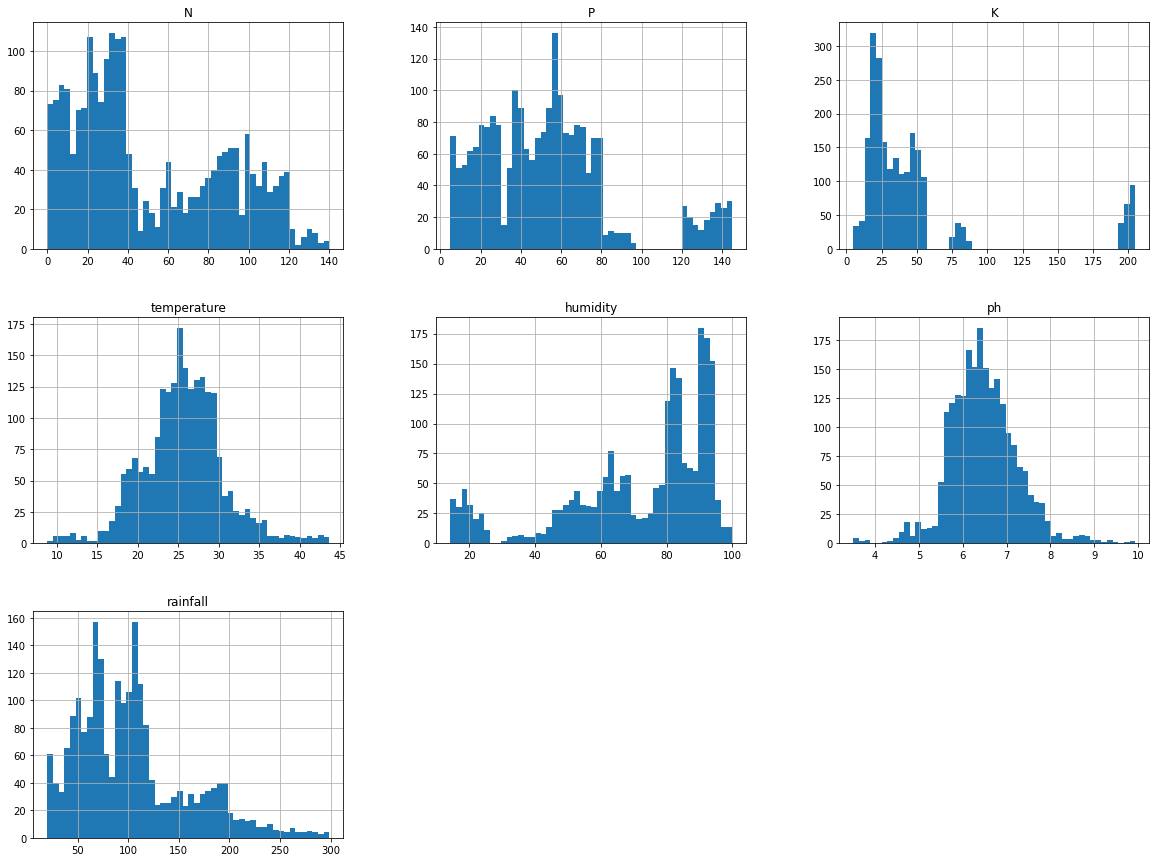

In [9]:
df1.hist(bins=50, figsize=(20, 15))

In [10]:
df2 = df1.drop(['label'], axis=1)

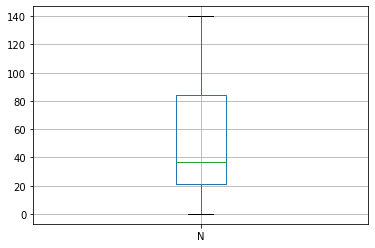

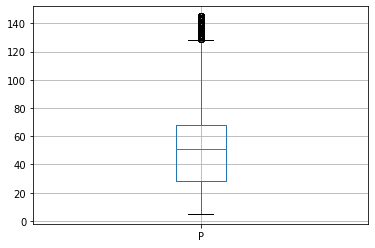

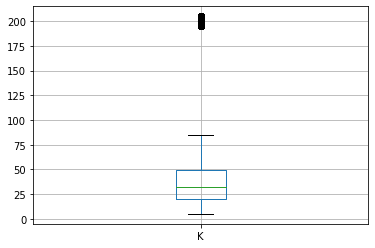

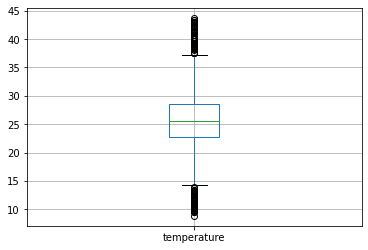

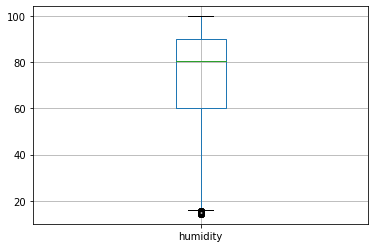

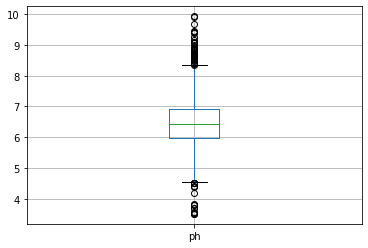

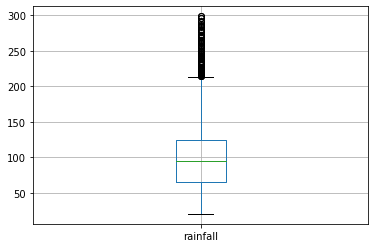

In [11]:
# Box plot for visualizig the outliers in the dataset
for column in df2:
    plt.figure()
    df2.boxplot([column])

In [12]:
columns = df1.columns[:-1]

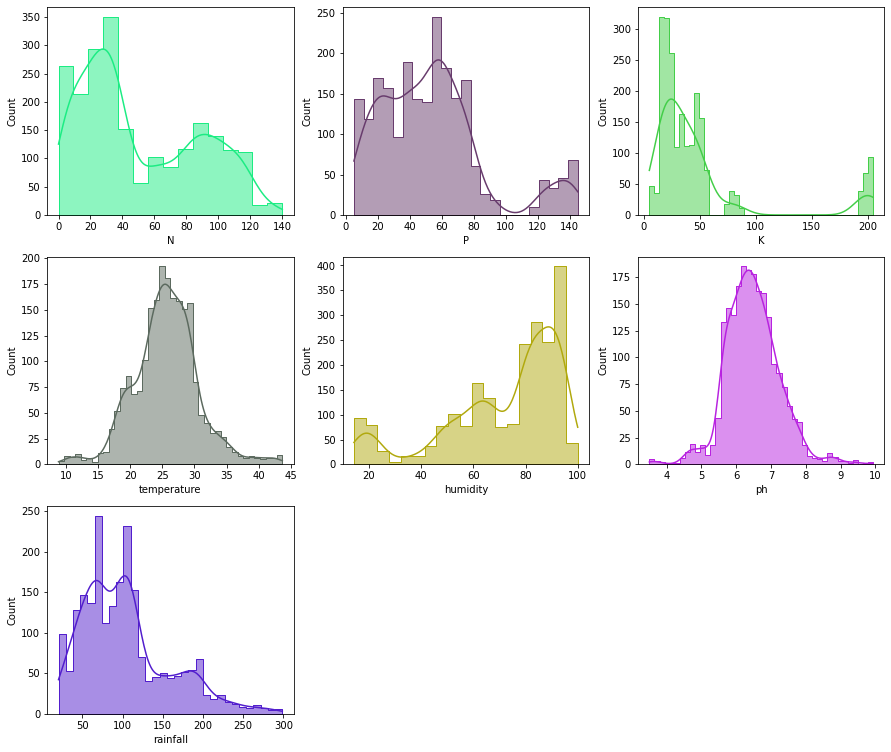

In [13]:
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(df1[column], kde = True, color = rgb, element = 'step')
    i+=1
plt.show()

<AxesSubplot:>

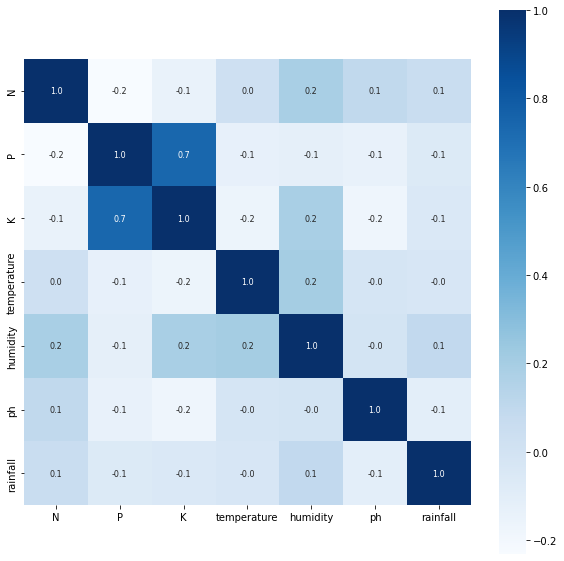

In [14]:
correlation = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
df1['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

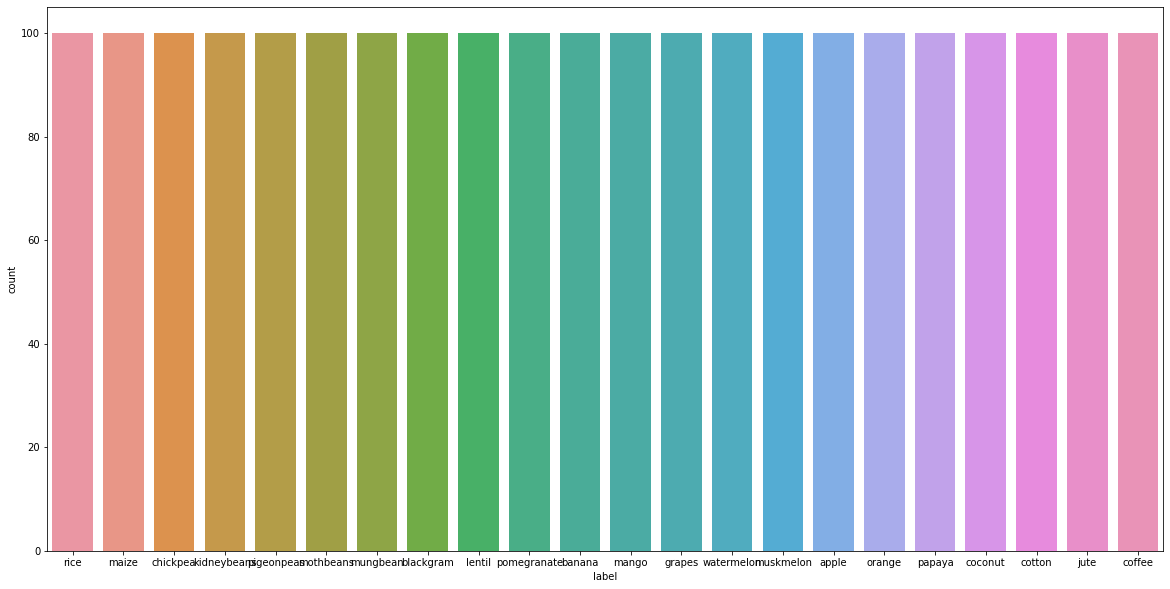

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='label',data=df1) 

In [17]:
#  lets check summry of all dataset
print("Average ratio of Nitrogen in soil : {0:2f}".format(df1['N'].mean()))
print("Average ratio of phasphorous in soil : {0:2f}".format(df1['P'].mean()))
print("Average ratio of potasium in soil : {0:2f}".format(df1['K'].mean()))
print("Average ratio of temperature in soil : {0:2f}".format(df1['temperature'].mean()))
print("Average ratio of humidity in soil : {0:2f}".format(df1['humidity'].mean()))
print("Average ratio of ph in soil : {0:2f}".format(df1['ph'].mean()))
print("Average ratio of rainfall in soil : {0:2f}".format(df1['rainfall'].mean()))

Average ratio of Nitrogen in soil : 50.551818
Average ratio of phasphorous in soil : 53.362727
Average ratio of potasium in soil : 48.149091
Average ratio of temperature in soil : 25.616244
Average ratio of humidity in soil : 71.481779
Average ratio of ph in soil : 6.469480
Average ratio of rainfall in soil : 103.463655


In [18]:
#  leat check the summary statistics for each of the crops 
@interact 
def summary(crops = list(df1['label'].value_counts().index)):
    x = df1[df1['label']==crops]
    print('-----------------------------------------------')
    print('Statistic for Nitrogen')
    print('Minimum Nitrogen required :',x['N'].min())
    print('Average Nitrogen required :',x['N'].mean())
    print('Maximum Nitrogen required :',x['N'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum phosphorous required :',x['P'].min())
    print('Average phosphorous required :',x['P'].mean())
    print('Maximum phosphorous required :',x['P'].max())
    print("------------------------------------------------")
    print('Statistic for Nitrogen')
    print('Minimum potassium required :',x['K'].min())
    print('Average potassium required :',x['K'].mean())
    print('Maximum potassium required :',x['K'].max())
    print("------------------------------------------------")
    print("Statistic for temperature")
    print("Minimum Temperature required : {0:2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:2f}".format(x['temperature'].max()))
    print("------------------------------------------------")
    print("Statistic for humidity")
    print("Minimum humidity required : {0:2f}".format(x['humidity'].min()))
    print("Average humidity required : {0:2f}".format(x['humidity'].mean()))
    print("Maximum humidity required : {0:2f}".format(x['humidity'].max()))
    print("------------------------------------------------")
    print("Statistic for rainfall")
    print("Minimum rainfall required : {0:2f}".format(x['rainfall'].min()))
    print("Average rainfall required : {0:2f}".format(x['rainfall'].mean()))
    print("Maximum rainfall required : {0:2f}".format(x['rainfall'].max()))
    print("Statistic for ph")
    print("Minimum ph required : {0:2f}".format(x['ph'].min()))
    print("Average ph required : {0:2f}".format(x['ph'].mean()))
    print("Maximum ph required : {0:2f}".format(x['ph'].max()))
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [19]:
crops = list(df1['label'].value_counts().index)
crops

['rice',
 'maize',
 'jute',
 'cotton',
 'coconut',
 'papaya',
 'orange',
 'apple',
 'muskmelon',
 'watermelon',
 'grapes',
 'mango',
 'banana',
 'pomegranate',
 'lentil',
 'blackgram',
 'mungbean',
 'mothbeans',
 'pigeonpeas',
 'kidneybeans',
 'chickpea',
 'coffee']

In [20]:
y = df1[df1['label']=='rice']
y

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [21]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Average value for',conditions,'is {0:.2f}'.format(df1[conditions].mean()))
    print("------------------------------------------------------------------------")
    print('Rice : {0:2f}'.format(df1[(df1['label']=='rice')][conditions].mean()))
    print('lentil : {0:2f}'.format(df1[(df1['label']=='lentil')][conditions].mean()))
    print('cotton : {0:2f}'.format(df1[(df1['label']=='cotton')][conditions].mean()))
    print('mungbean : {0:2f}'.format(df1[(df1['label']=='mungbean')][conditions].mean()))
    print('jute : {0:2f}'.format(df1[(df1['label']=='jute')][conditions].mean()))
    print('muskmelon : {0:2f}'.format(df1[(df1['label']=='muskmelon')][conditions].mean()))
    print('blackgram : {0:2f}'.format(df1[(df1['label']=='blackgram')][conditions].mean()))
    print('papaya : {0:2f}'.format(df1[(df1['label']=='papaya')][conditions].mean()))
    print('orange : {0:2f}'.format(df1[(df1['label']=='orange')][conditions].mean()))
    print('apple : {0:2f}'.format(df1[(df1['label']=='apple')][conditions].mean()))
    print('pigeonpeas : {0:2f}'.format(df1[(df1['label']=='pigeonpeas')][conditions].mean()))
    print('coffee : {0:2f}'.format(df1[(df1['label']=='coffee')][conditions].mean())) 
    print('maize : {0:2f}'.format(df1[(df1['label']=='maize')][conditions].mean()))
    print('chickpea : {0:2f}'.format(df1[(df1['label']=='chickpea')][conditions].mean()))
    print('pomegranate : {0:2f}'.format(df1[(df1['label']=='pomegranate')][conditions].mean()))
    print('kidneybeans : {0:2f}'.format(df1[(df1['label']=='kidneybeans')][conditions].mean()))
    print('mango : {0:2f}'.format(df1[(df1['label']=='mango')][conditions].mean()))
    print('banana : {0:2f}'.format(df1[(df1['label']=='banana')][conditions].mean()))
    print('grapes : {0:2f}'.format(df1[(df1['label']=='grapes')][conditions].mean()))
    print('mothbeans : {0:2f}'.format(df1[(df1['label']=='mothbeans')][conditions].mean()))
    print('watermelon : {0:2f}'.format(df1[(df1['label']=='watermelon')][conditions].mean()))
    print('coconut : {0:2f}'.format(df1[df1['label']=='coconut'][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

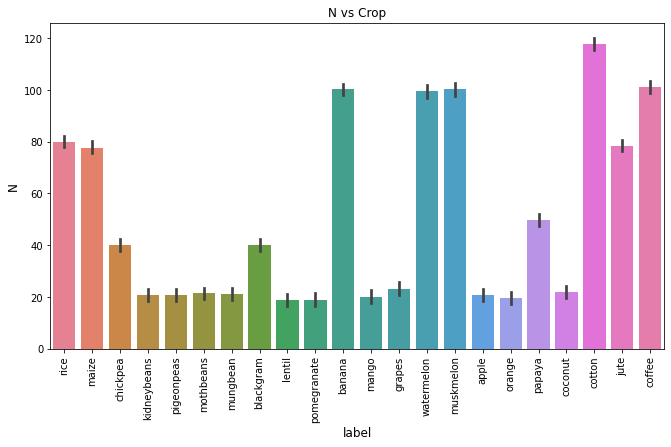

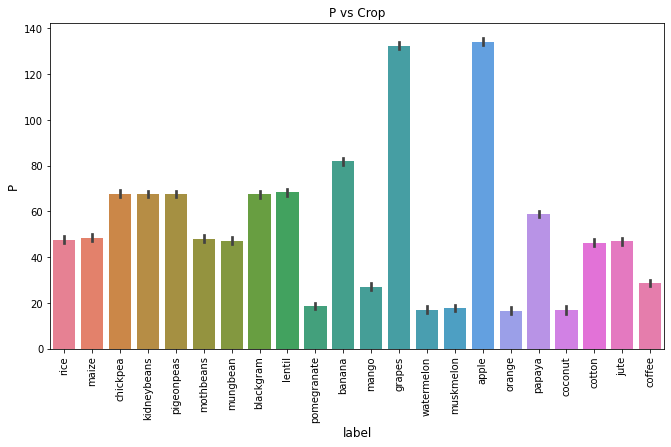

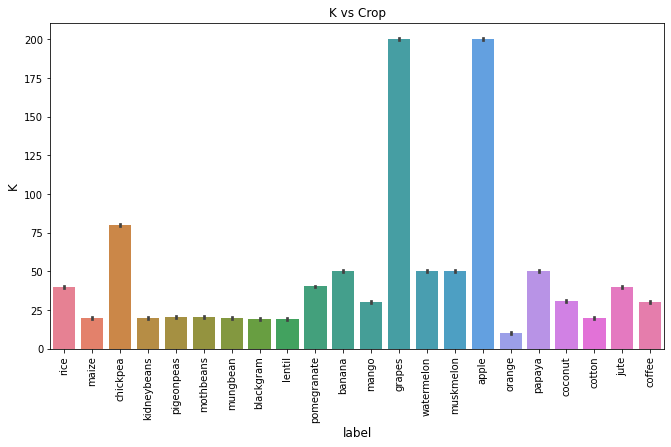

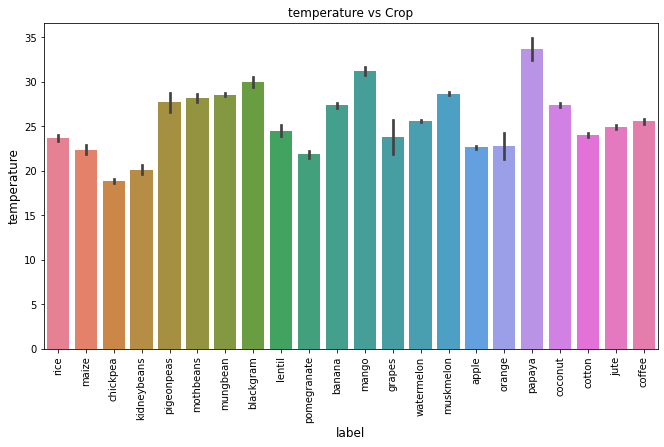

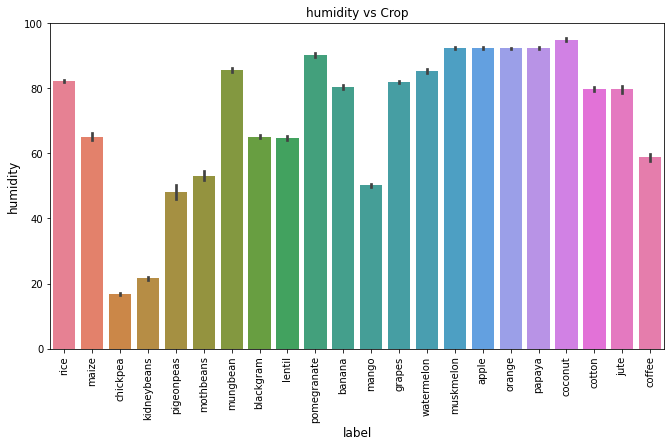

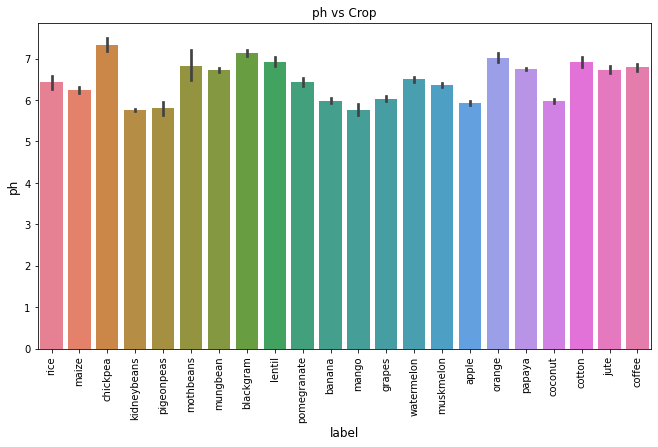

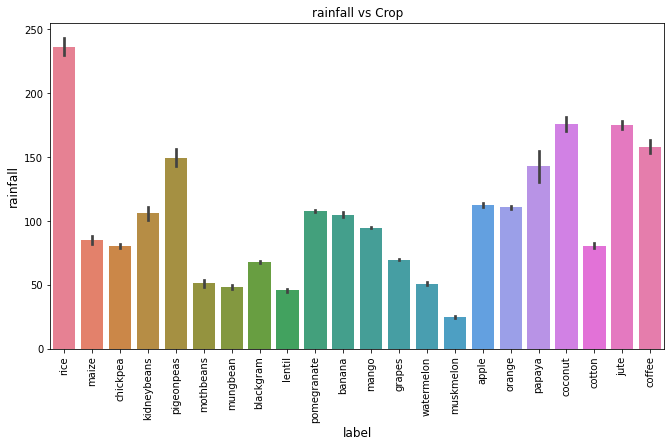

In [22]:
for column in columns:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'label', y = column, data = df1, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

<Figure size 1440x720 with 0 Axes>

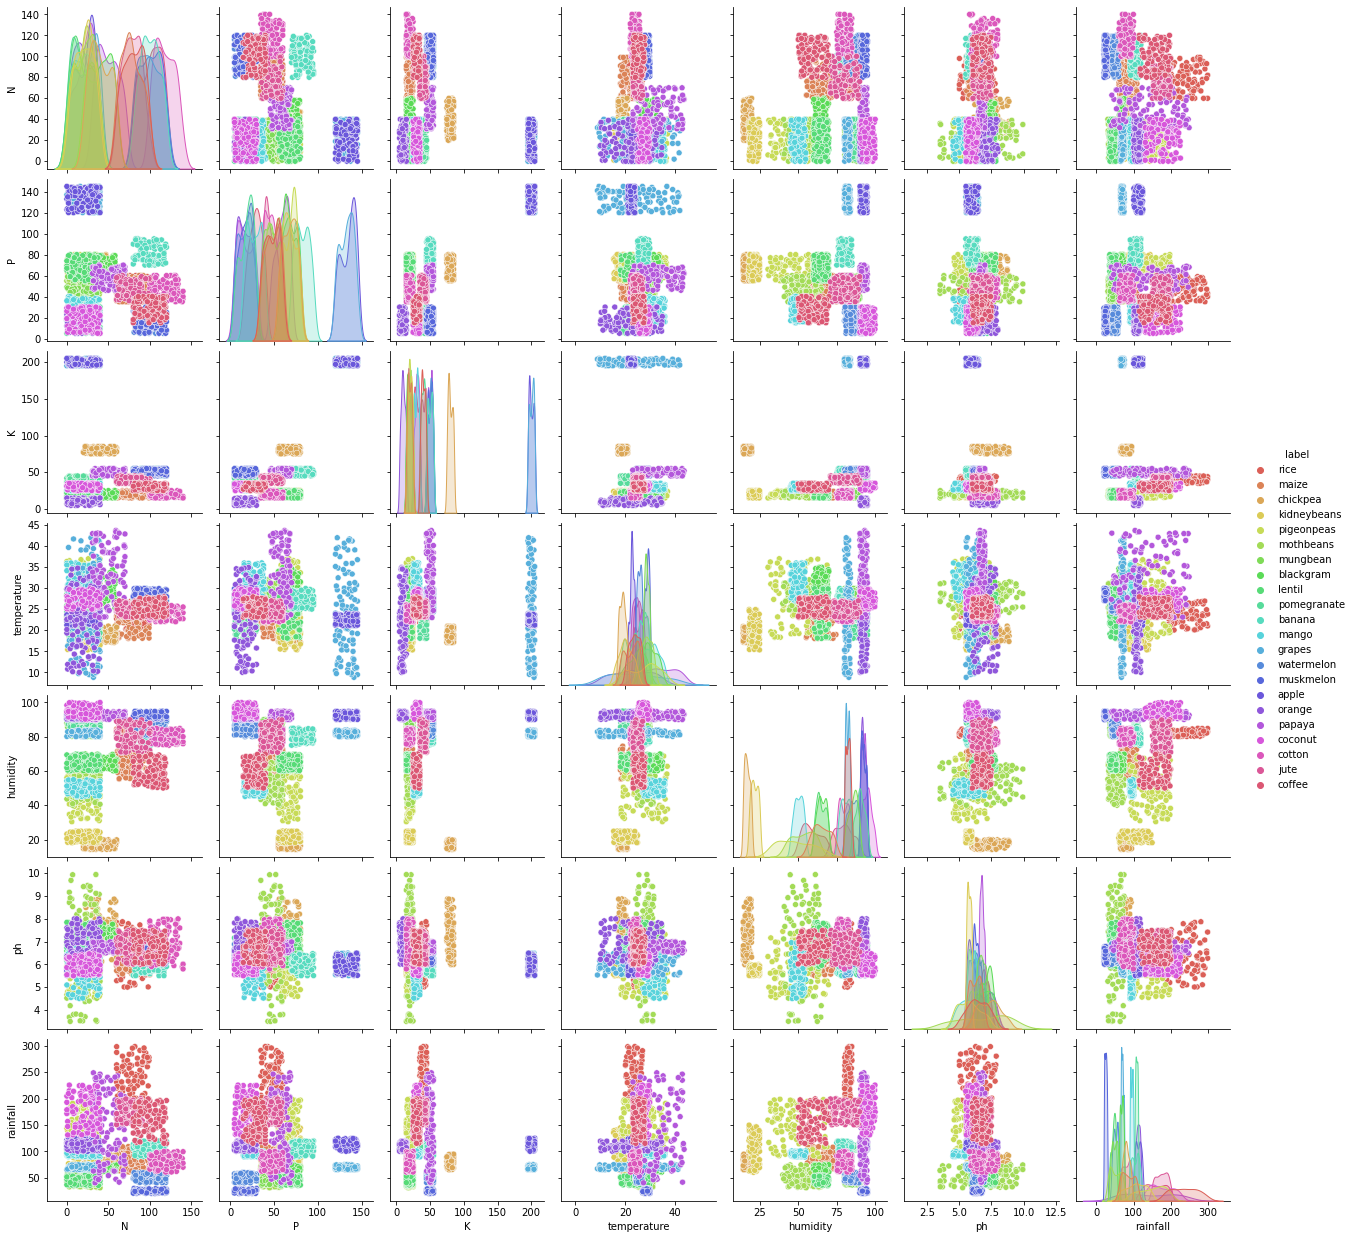

In [23]:
plt.figure(figsize = (20, 10))
sns.pairplot(df1, hue = 'label', palette = 'hls')
plt.show()

In [24]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("crops which required grater than average",conditions,'\n')
    print(df1[df1[conditions]> df1[conditions].mean()]['label'].unique())
    print("-----------------------------------------------------------")
    print("crops which required less than average",conditions,'\n')
    print(df1[df1[conditions] <= df1[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [25]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [26]:
conditions = ['N','P','K','temperature','ph','humidity','rainfall']
df1[conditions].mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
ph               6.469480
humidity        71.481779
rainfall       103.463655
dtype: float64

In [27]:
print("some interesting patterns")
print("-------------------------")
print("crops which requires very High Ratio Nitrogen Content in soil:",df1[df1['N']>120]['label'].unique())
print("crops which requires very High Ratio phasphorous Content in soil:",df1[df1['P']>100]['label'].unique())
print("crops which requires very High Ratio potassium Content in soil:",df1[df1['K']>200]['label'].unique())
print("crops which requires very High Rainfall :",df1[df1['rainfall']>200]['label'].unique())
print("crops which requires very low temperature :",df1[df1['temperature']<10]['label'].unique())
print("crops which requires very HIgh temperature :",df1[df1['temperature']>40]['label'].unique())
print("crops which requires very low humidity :",df1[df1['humidity']<20]['label'].unique())
print("crops which requires very low ph :",df1[df1['ph']<4]['label'].unique())
print("crops which requires very low ph :",df1[df1['ph']>9]['label'].unique())

some interesting patterns
-------------------------
crops which requires very High Ratio Nitrogen Content in soil: ['cotton']
crops which requires very High Ratio phasphorous Content in soil: ['grapes' 'apple']
crops which requires very High Ratio potassium Content in soil: ['grapes' 'apple']
crops which requires very High Rainfall : ['rice' 'papaya' 'coconut']
crops which requires very low temperature : ['grapes']
crops which requires very HIgh temperature : ['grapes' 'papaya']
crops which requires very low humidity : ['chickpea' 'kidneybeans']
crops which requires very low ph : ['mothbeans']
crops which requires very low ph : ['mothbeans']


In [28]:
print("summer crops:")
print(df1[(df1['temperature'] > 30) & (df1['humidity'] > 50)]['label'].unique())
print('---------------------------')
print("Winter crops:")
print(df1[(df1['temperature'] < 20) & (df1['humidity'] > 30)]['label'].unique())
print('---------------------------')
print("Rainy Season crops:")
print(df1[(df1['rainfall'] > 200) & (df1['humidity'] > 30)]['label'].unique())

summer crops:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------
Winter crops:
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------
Rainy Season crops:
['rice' 'papaya' 'coconut']


# Clustering

In [29]:
from sklearn.cluster import KMeans
x = df1.drop(['label'],axis=1)

x = x.values

print(x.shape)
x[0]

(2200, 7)


array([ 90.        ,  42.        ,  43.        ,  20.87974371,
        82.00274423,   6.50298529, 202.9355362 ])

In [30]:
# lets implement the k means Algorithm to perform clustering analysis

kn = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300,n_init = 10, random_state = 0)
y_means = kn.fit_predict(x)

# lets find out the Result
a=df1['label']
y_mean = pd.DataFrame(y_means)
z = pd.concat( [ y_mean,a ] , axis = 1)
z = z.rename(columns = {0:'cluster'})
# lets check clusters of each crops

print('lets check the Result After Applying the k Means Custering Analysis \n')
print('crops in first cluster:',z[z['cluster']==0]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==1]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==2]['label'].unique())
print('----------------------------------------------------------------------')
print('crops in first cluster:',z[z['cluster']==3]['label'].unique())
print('----------------------------------------------------------------------')

lets check the Result After Applying the k Means Custering Analysis 

crops in first cluster: ['grapes' 'apple']
----------------------------------------------------------------------
crops in first cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------------
crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------------
crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------------


In [31]:
#  lets split the Dataset for predictive Modeling 

y = df1['label']
x = df1.drop(['label'],axis = 1)

print('shape of x: ',x.shape)
print('shape of y: ',y.shape)

shape of x:  (2200, 7)
shape of y:  (2200,)


In [32]:
acc =[]
model =[]

In [33]:
# lets create training and testing sets for validation of Result
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

print('The shape of x_train', x_train.shape)
print('The shape of x_test', x_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of x_train (1760, 7)
The shape of x_test (440, 7)
The shape of y_train (1760,)
The shape of y_test (440,)


# Model Training & Evaluation & Selection of Model

# 1. Decision Tree

In [34]:
from sklearn import tree
model_Dt = tree.DecisionTreeClassifier(random_state=10, max_depth=100)
model_Dt.fit(x_train,y_train)
y_pred_Dt = model_Dt.predict(x_test)

In [35]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_Dt))
model.append('Decision Tree')
Decision_Tree_Accuracy = metrics.accuracy_score(y_test, y_pred_Dt)
Decision_Tree_Accuracy

0.9954545454545455

In [36]:
sum(y_pred_Dt == y_test)

438

In [37]:
len(y_test)

440

In [38]:
sum(y_pred_Dt != y_test)

2

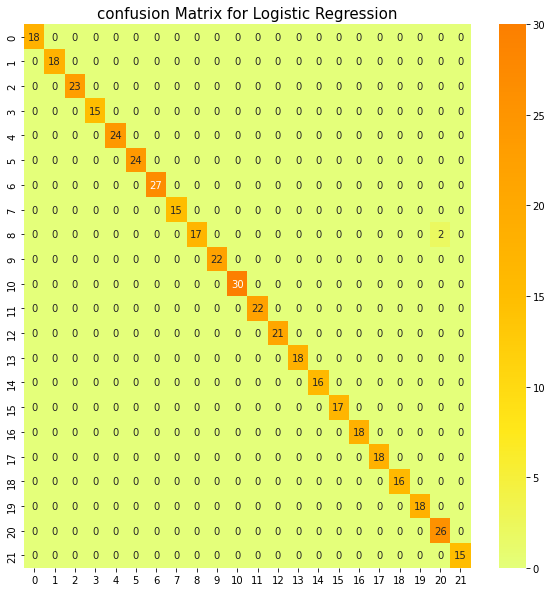

In [39]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_Dt)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [40]:
report = metrics.classification_report(y_test,y_pred_Dt)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.89      0.94        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

# 2.SVM

In [41]:
from sklearn.svm import SVC
model_svc = SVC(C=0.3,kernel='linear')
model_svc.fit(x_train,y_train)
y_pred_SVC = model_svc.predict(x_test)

In [42]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_SVC))
model.append('SVM')
SVM_Accuracy = metrics.accuracy_score(y_test, y_pred_SVC)
SVM_Accuracy

0.9931818181818182

In [43]:
sum(y_pred_SVC == y_test), sum(y_pred_SVC != y_test), len(y_test)


(437, 3, 440)

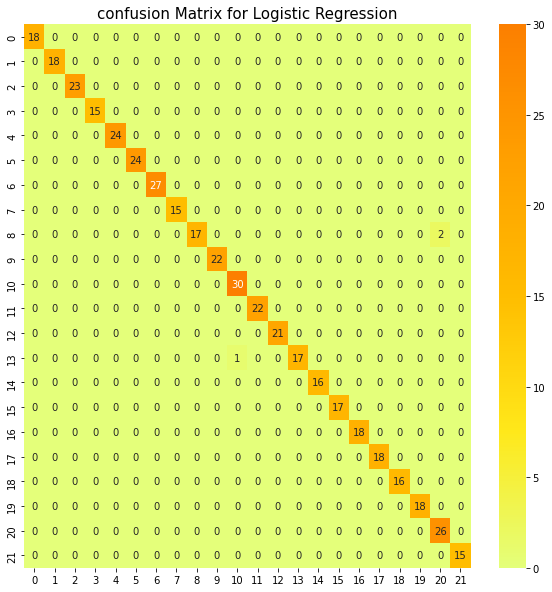

In [44]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_SVC)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix for Logistic Regression',fontsize = 15)
plt.show()

In [45]:
report = metrics.classification_report(y_test,y_pred_SVC)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.89      0.94        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.97      1.00      0.98        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.94      0.97        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

# 3. Linear Regression

In [46]:
from sklearn.linear_model import LogisticRegression

model_LG = LogisticRegression(C=0.3)
model_LG.fit(x_train,y_train)
y_pred_LG = model_LG.predict(x_test)

C:\Users\M_ISHFAQ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# calculate accuracy
from sklearn import metrics
acc.append(metrics.accuracy_score(y_test, y_pred_LG))
model.append('LogisticRegression')
Logistic_Regression_Accuracy = metrics.accuracy_score(y_test, y_pred_LG)
Logistic_Regression_Accuracy

0.9681818181818181

In [48]:
sum(y_pred_LG == y_test) , sum(y_pred_LG != y_test), len(y_test)

(426, 14, 440)

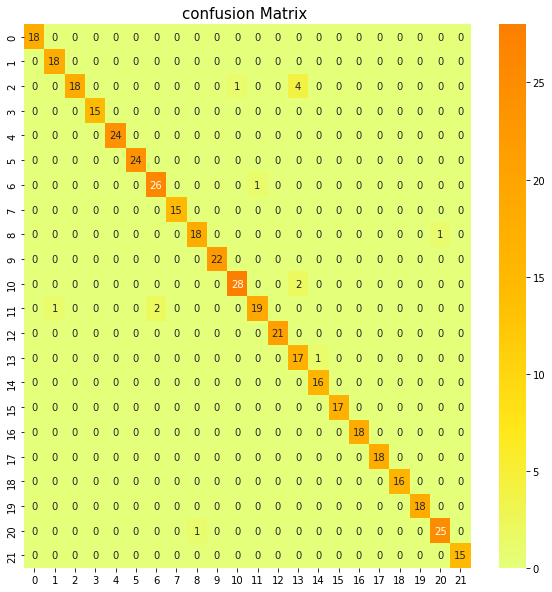

In [49]:
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_LG)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix ',fontsize = 15)
plt.show()

In [50]:
report = metrics.classification_report(y_test,y_pred_LG)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       0.95      1.00      0.97        18
   blackgram       1.00      0.78      0.88        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       0.93      0.96      0.95        27
      grapes       1.00      1.00      1.00        15
        jute       0.95      0.95      0.95        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.97      0.93      0.95        30
       maize       0.95      0.86      0.90        22
       mango       1.00      1.00      1.00        21
   mothbeans       0.74      0.94      0.83        18
    mungbean       0.94      1.00      0.97        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

# 4. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier( max_depth=21, n_estimators=41)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [52]:
acc.append(metrics.accuracy_score(y_test, y_pred_rf))
model.append('RandomForest')
Random_Forest_Accuracy = metrics.accuracy_score(y_test,y_pred_rf)
Random_Forest_Accuracy

0.9977272727272727

In [53]:
sum(y_pred_rf == y_test), sum(y_pred_rf != y_test),len(y_test)

(439, 1, 440)

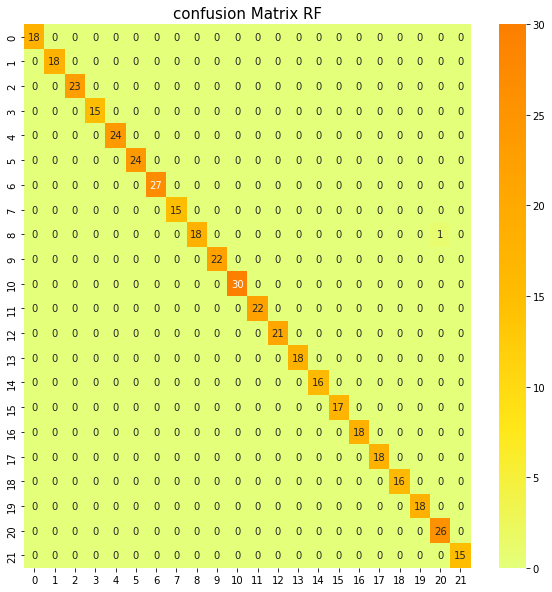

In [54]:
# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix RF',fontsize = 15)
plt.show()

In [55]:
report = metrics.classification_report(y_test,y_pred_rf)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

# 5. KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size= 1,p= 15,n_neighbors= 5)
knn.fit(x_train, y_train)
KNN_Accuracy = knn.score(x_test, y_test)
KNN_Accuracy

0.9840909090909091

In [57]:
y_pred_knn = knn.predict(x_test)
acc.append(metrics.accuracy_score(y_test, y_pred_knn))
model.append('KNN')

In [58]:
sum(y_pred_knn == y_test), sum(y_pred_knn != y_test),len( y_test)

(433, 7, 440)

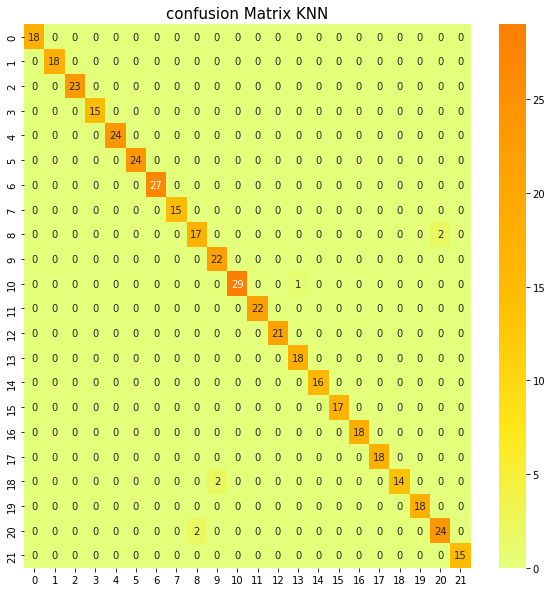

In [59]:
# lets print the confusion matrix first 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot = True, cmap = 'Wistia' )
plt.title('confusion Matrix KNN',fontsize = 15)
plt.show()

In [60]:
report = metrics.classification_report(y_test,y_pred_knn)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       0.89      0.89      0.89        19
 kidneybeans       0.92      1.00      0.96        22
      lentil       1.00      0.97      0.98        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      1.00      0.97        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

In [61]:
prediction = model_Dt.predict((np.array([[108,
                                       35,
                                       30,
                                       30,
                                       70,
                                       7,
                                       180]])))
print('the suggested crop for Given climate condition is :',prediction)

the suggested crop for Given climate condition is : ['coffee']


In [62]:
predictionn = model_svc.predict((np.array([[27,120,200,21.452787,90.745319,6.110219,116.703658]])))
print('the suggested crop by SVC for Given climate condition is :',predictionn)

the suggested crop by SVC for Given climate condition is : ['apple']


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

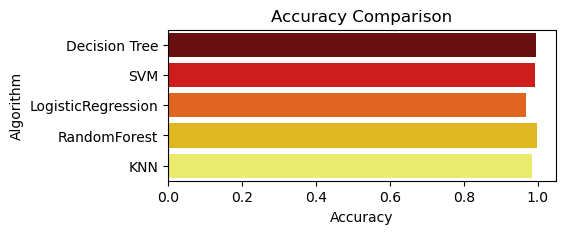

In [63]:
plt.figure(figsize=[5,2],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='hot')

# Save Model

In [64]:
import pickle

In [65]:
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

# Load Model

In [66]:
model_rf_1 = pickle.load(open('model_rf.pkl', 'rb'))

# Prediction Model

In [67]:
input_data=(85, 58, 41, 21.770462, 80.319644, 7.038096, 226.655537)
#Change the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#std_data=scaler.transform(input_data_reshaped)
#print(std_data)
prediction=model_rf_1.predict(input_data_reshaped)
print(prediction)
    
print(input_data_reshaped)

['rice']
[[ 85.        58.        41.        21.770462  80.319644   7.038096
  226.655537]]
